## LSUN pretrained checkpoint

In [26]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load(f'../Samples/LSUN/samples_252x256x256x3.npz')
batches = data[data.files[0]]

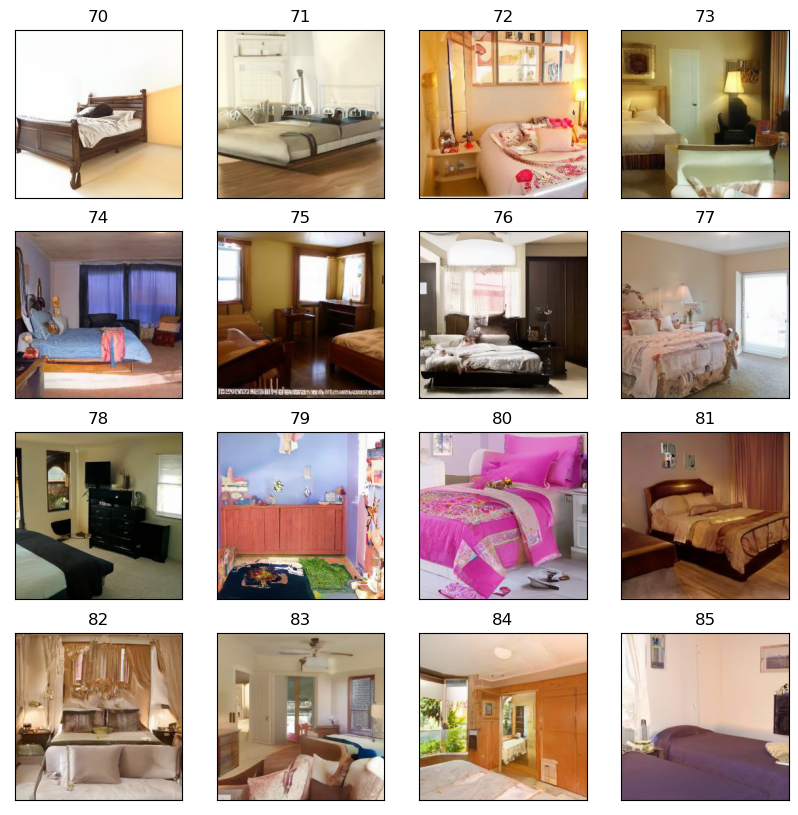

In [28]:
start=70
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(batches[i+start,:,:,])
    plt.xticks([])
    plt.yticks([])
    plt.title(i+start)
#plt.savefig(fname="img/T1CE_second_4")
plt.show()

## Experiment 3
- exactly same setup as LSUN bedroom model regarding training params
- batch size 128 with minibatch 7 

So 7 images per minibatch, 128/7=18.3 minibatches per full batch. Meaning **128 images per (gradient-)step.**

Saving before: 10,000 steps x 7 per step = 70,000 pics.

In the OG paper for LSUN bedroom they used 64 x 2,400,000 steps = 153.6M pics based on 50K trainpics **(=153.6M/50K=3000 epochs)**. In the follow up one the trained as follows: 256 x 500,000 steps = 128M pics. 

The code that is used here, that was specifically used to train the unconditional LSUN bedroom model used batch 128 on 1,2M steps. Total: 128x1200000=153.6M pics=3072 epochs)

The distribution of our data is a lot less complex/diverse so less steps/epochs should be necessary to sufficiently learn the distribution. We have **23,478** pics in our dataset. To reach the same amount of epochs we would need to take (23478x3072)/128 = 563.5K steps. Let's see how far we get. One full epoch after 184 steps. 

Training times: 
- Experiment 2: 13:58 to 15:51 = 2hrs (~113 min) for 7x10,000=70,000 pics, so (113x60)x100/70000=9.68s/100pics
- Experiment 3: with microbatching 114s for 10*128 so 8.9s/100pics even faster?

#### Training progress

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

exp_3 = pd.read_csv("../Checkpoints/Checkpoint_TwoChan_Exp_3/progress.csv")

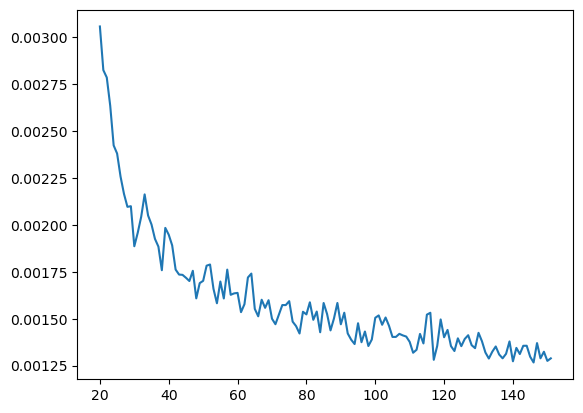

In [24]:
plt.plot(exp_3.loss_q1[20:])

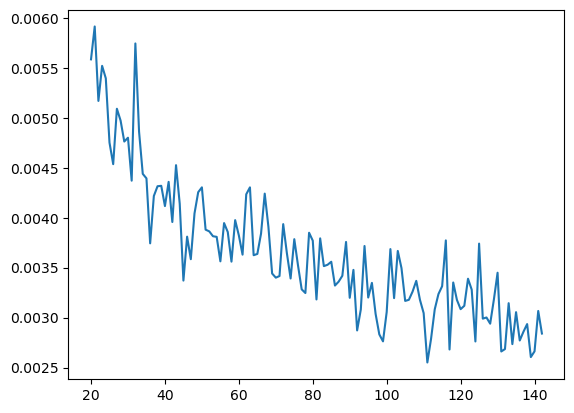

In [14]:
plt.plot(exp_3.mse[20:])